In [2]:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import h5py
import json

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import readligo as rl

In [6]:
fnjson = "BBH_events_v3.json"
events = json.load(open(fnjson,"r"))

eventname = ''
eventname = 'GW150914' 

/Users/catherineboisvert/LOSC_Event_tutorial/readligo.py:138: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  shortnameArray = dqInfo['DQShortnames'].value
/Users/catherineboisvert/LOSC_Event_tutorial/readligo.py:144: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  injnameArray = injInfo['InjShortnames'].value
/Users/catherineboisvert/LOSC_Event_tutorial/readligo.py:149: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  gpsStart = meta['GPSstart'].value


Text(0.5, 1.0, 'Advanced LIGO strain data near GW150914')

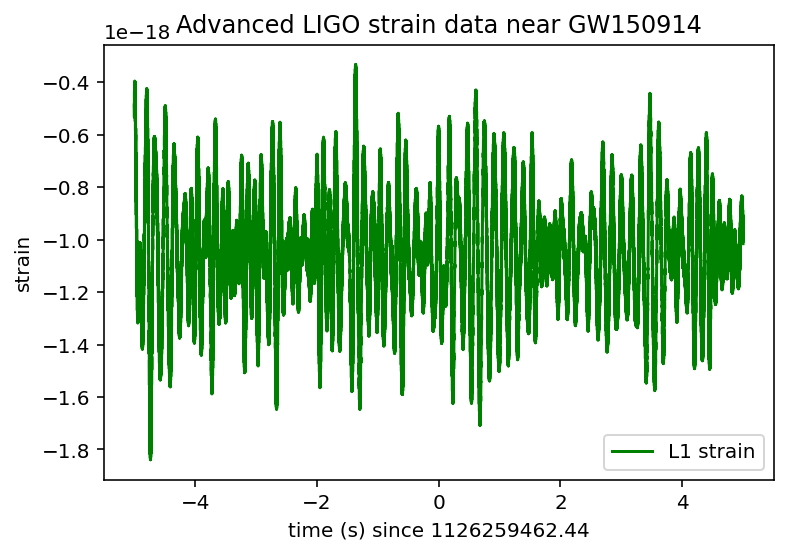

In [11]:
# Let's start with Linvingston detector
# We want to do a noise model for this detector.
#Code should loop over events and rpint the hdf5 files. 

event = events[eventname]
fn_L1 = event['fn_L1']
fn_template = event['fn_template']  # File name for template waveform
fs = event['fs']                    # Set sampling rate
tevent = event['tevent']            # Set approximate event GPS time
fband = event['fband'] 

# Reading in the Livingston detector data.
strain_L1, time_L1, chan_dict_L1 = rl.loaddata(fn_L1, 'L1')

# both H1 and L1 will have the same time vector, so:
time = time_L1
# the time sample interval (uniformly sampled!)
dt = time[1] - time[0]

deltat = 5
indxt = np.where((time >= tevent-deltat) & (time < tevent+deltat))
#print(tevent)


plt.figure()
plt.plot(time[indxt]-tevent,strain_L1[indxt],'g',label='L1 strain')
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('strain')
plt.legend(loc='lower right')
plt.title('Advanced LIGO strain data near '+eventname)
#plt.savefig(eventname+'_strain.png')